In [ ]:
import pandas as pd
from collections import Counter
import itertools
# Load the csv file
dataframe = pd.read_csv("dataset/creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataframe.isnull().values.any()


False

In [ ]:
dataframe["Amount"].describe()


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


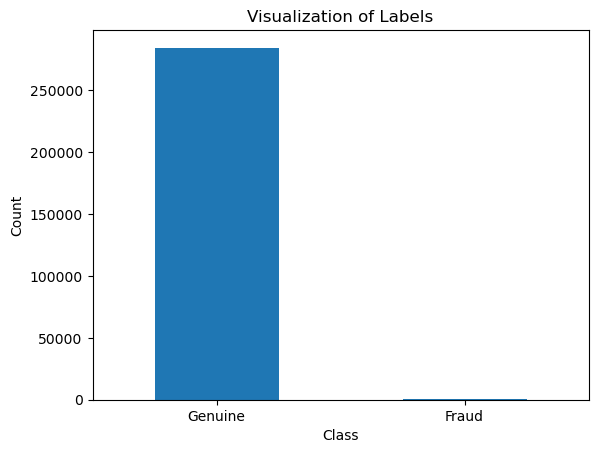

In [ ]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [ ]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
decision_tree = DecisionTreeClassifier()
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [ ]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.95903701883127
Decision Tree Score:  99.91807403766254


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [ ]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

Confusion Matrix - Decision Tree
[[85261    46]
 [   24   112]]


NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99918
Precision: 0.70886
Recall: 0.82353
F1-score: 0.76190


## Address the Class-Imbalance issue

The Random Forest model works better than Decision Trees. But, if we observe our dataset suffers a serious problem of class imbalance. The genuine (not fraud) transactions are more than 99% with the credit card fraud transactions constituting 0.17%.

The class imbalance problem can be solved by various techniques. Oversampling is one of them.

Oversample the minority class is one of the approaches to address the imbalanced datasets. The easiest solution entails doubling examples in the minority class, even though these examples contribute no new data to the model.

Instead, new examples may be generated by replicating existing ones. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a method of data augmentation for the minority class.

The above SMOTE is present in the imblearn package. Let’s import that and resample our data.

In the following code below, we resampled our data and we split it using train_test_split() with a split of 70-30.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [ ]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)
predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [ ]:
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

Confusion Matrix - Random Forest
[[85128    21]
 [    0 85440]]


NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99988
Precision: 0.99975
Recall: 1.00000
F1-score: 0.99988


## Using Neural Network

In [ ]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=train_X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1505 (5.88 KB)
Trainable params: 1505 (5.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(test_X, test_Y))


Epoch 1/10
6220/6220 [==============================] - 5s 680us/step - loss: 0.1345 - accuracy: 0.9442 - val_loss: 0.0361 - val_accuracy: 0.9897
Epoch 2/10
6220/6220 [==============================] - 4s 662us/step - loss: 0.0522 - accuracy: 0.9801 - val_loss: 0.0228 - val_accuracy: 0.9945
Epoch 3/10
6220/6220 [==============================] - 4s 658us/step - loss: 0.0431 - accuracy: 0.9837 - val_loss: 0.0186 - val_accuracy: 0.9955
Epoch 4/10
6220/6220 [==============================] - 4s 663us/step - loss: 0.0404 - accuracy: 0.9845 - val_loss: 0.0161 - val_accuracy: 0.9971
Epoch 5/10
6220/6220 [==============================] - 4s 649us/step - loss: 0.0387 - accuracy: 0.9853 - val_loss: 0.0152 - val_accuracy: 0.9970
Epoch 6/10
6220/6220 [==============================] - 4s 647us/step - loss: 0.0370 - accuracy: 0.9861 - val_loss: 0.0162 - val_accuracy: 0.9965
Epoch 7/10
6220/6220 [==============================] - 4s 643us/step - loss: 0.0370 - accuracy: 0.9862 - val_loss: 0.0142 -

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = (model.predict(test_X) > 0.5).astype("int32")

# Evaluation
print(confusion_matrix(test_Y, y_pred))
print(classification_report(test_Y, y_pred))
print('ROC AUC score:', roc_auc_score(test_Y, y_pred))

# Plotting training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


 932/5331 [====>.........................] - ETA: 1s